In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer






/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_9162/1723875473.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
file_path = 'datasets/SBAnational.csv'
df_initial = pd.read_csv(file_path)
selected_columns = ['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 
                    'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 
                    'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'GrAppv']

df = df_initial[selected_columns]
df.to_csv('datasets/SBAnationalOnlyGoodFeatures.csv', index=False)




/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_9162/3539163449.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_initial = pd.read_csv(file_path)


In [4]:
df = df.dropna(subset=['MIS_Status'])

# Examinez les valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
print(df.isnull().sum())

mapping_mis_status = {'P I F': 1, 'CHGOFF': 0}
df['MIS_Status'] = df['MIS_Status'].map(mapping_mis_status)

# Définissez une fonction de transformation pour la colonne GrAppv
def transform_grappv(value):
    try:
        # Supprimez les symboles de dollar et les virgules, puis convertissez en flottant
        return float(value.replace('$', '').replace(',', ''))
    except ValueError:
        # Gérez les cas où la conversion n'est pas possible
        return None
# Appliquez la fonction de transformation à la colonne GrAppv
df['GrAppv'] = df['GrAppv'].apply(transform_grappv)

Nombre de valeurs manquantes par colonne :
Name               14
City               30
State              13
Zip                 0
Bank             1506
BankState        1513
NAICS               0
ApprovalDate        0
ApprovalFY          0
Term                0
NoEmp               0
NewExist          134
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4520
LowDoc           2578
MIS_Status          0
GrAppv              0
dtype: int64


In [5]:


colonnes_categorielles = ['Name', 'City', 'State', 'Bank', 'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'RevLineCr', 'LowDoc']
features_categorielles = df[colonnes_categorielles]
colonnes_numeriques = ['Zip', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'MIS_Status', 'GrAppv']
features_numeriques = df[colonnes_numeriques]




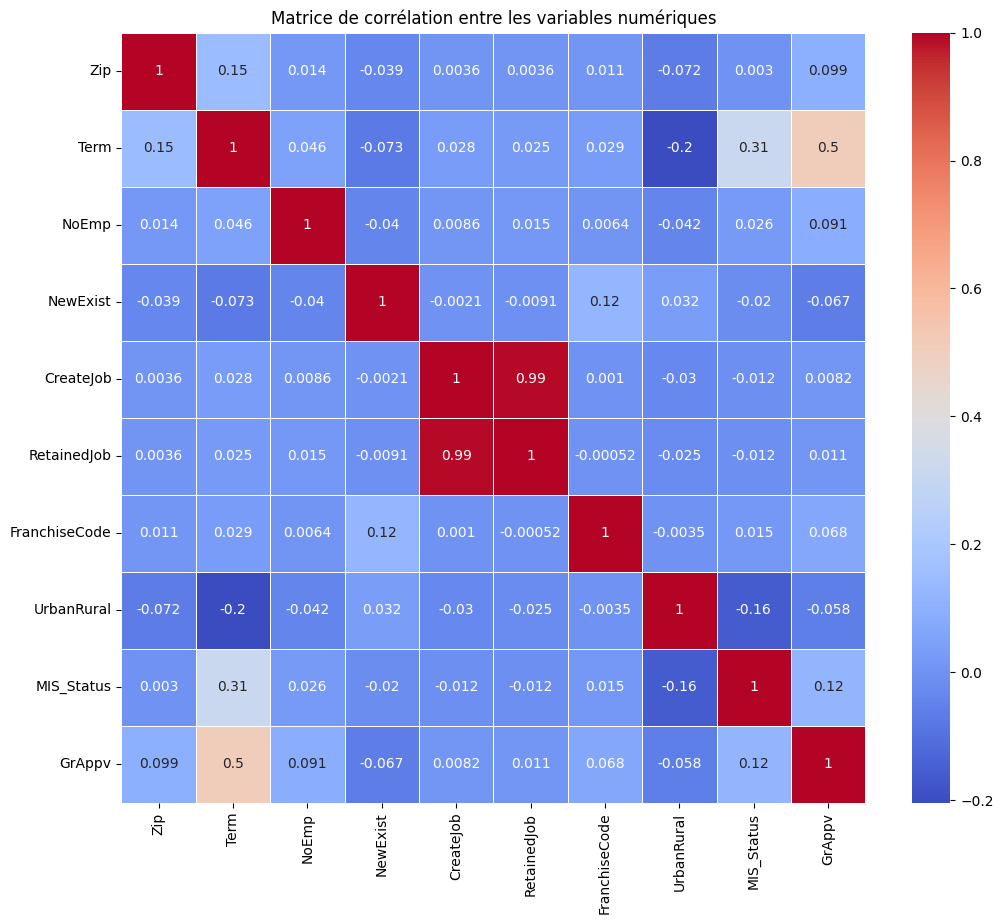

In [6]:

colonnes_numeriques = ['Zip', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'MIS_Status', 'GrAppv']
features_numeriques = df[colonnes_numeriques]

# Calculez la matrice de corrélation pour les colonnes numériques
correlation_matrix = features_numeriques.corr()

# Configurez la taille du graphique
plt.figure(figsize=(12, 10))

# Créez un heatmap avec Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Affichez le graphique
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()


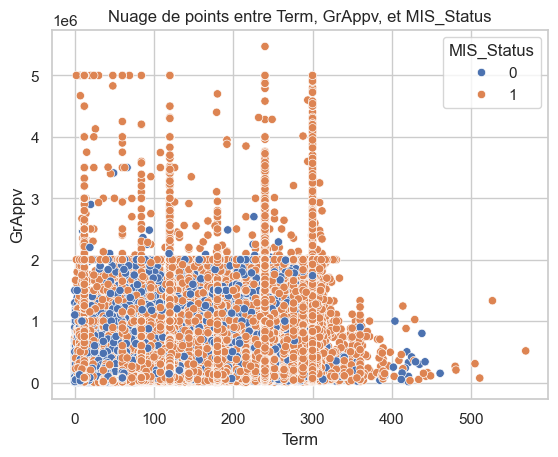

In [7]:
colonnes_numeriques = ['Zip', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'MIS_Status', 'GrAppv']
df_selection = df[colonnes_numeriques]

# Configurez le style de Seaborn
sns.set(style="whitegrid")

# Créez un nuage de points avec Seaborn
scatter_plot = sns.scatterplot(x='Term', y='GrAppv', hue='MIS_Status', data=df_selection)

# Ajoutez des labels et un titre
plt.xlabel('Term')
plt.ylabel('GrAppv')
plt.title('Nuage de points entre Term, GrAppv, et MIS_Status')

# Affichez la légende
plt.legend(title='MIS_Status')

# Affichez le graphique
plt.show()

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

def plot_term_analysis(df, term_column):
    # Traitement des valeurs manquantes avec SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Vous pouvez choisir une stratégie différente si nécessaire
    df[term_column] = imputer.fit_transform(df[[term_column]])

    # Créez des intervalles pour 'Term'
    df['Term_interval'] = pd.cut(df[term_column], bins=10)

    # Créez une table de contingence (crosstab) pour 'Term_interval' et 'MIS_Status'
    cross_tab = pd.crosstab(df['Term_interval'], df['MIS_Status'])

    # Plot avec des barres côte à côte
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Diagramme Boxplot
    sns.set(style="whitegrid")
    box_plot = sns.boxplot(x=term_column, data=df, hue='MIS_Status', palette="Set3", ax=axes[0])
    axes[0].set_xlabel(term_column)
    axes[0].set_ylabel('MIS_Status')
    axes[0].set_title(f'Boxplot entre {term_column} et MIS_Status')

    # Diagramme à barres
    cross_tab.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], ax=axes[1])
    axes[1].set_title(f'Distribution de {term_column} avec MIS_Status en couleur (10 barres)')
    axes[1].set_xlabel(f'{term_column} Interval')
    axes[1].set_ylabel('Count')
    axes[1].legend(title='MIS_Status', labels=['CHGOFF', 'P I F'])

    # Ajustez l'espacement entre les sous-graphiques
    plt.tight_layout()

    # Affichez les graphiques
    plt.show()

# Exemple d'utilisation avec votre DataFrame et la colonne 'Term'
# Assurez-vous que 'df' et 'Term' sont correctement définis avant d'appeler la méthode
# plot_term_analysis(df, 'Term')


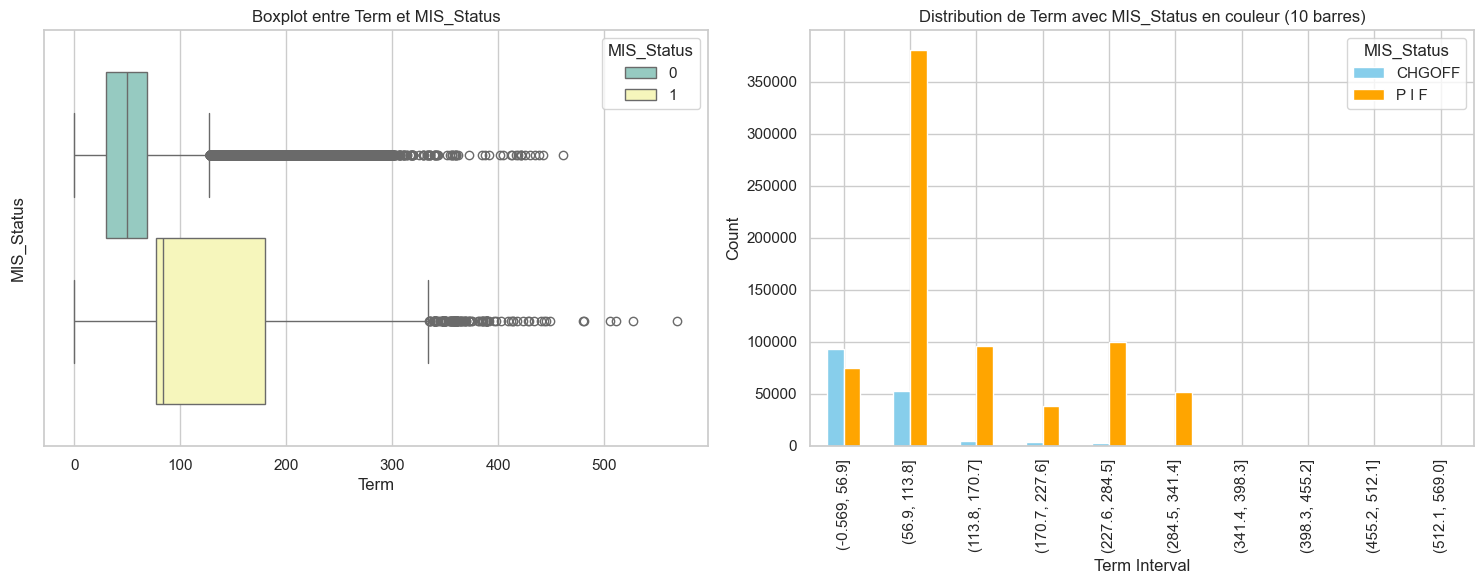

In [9]:
plot_term_analysis(df, 'Term')

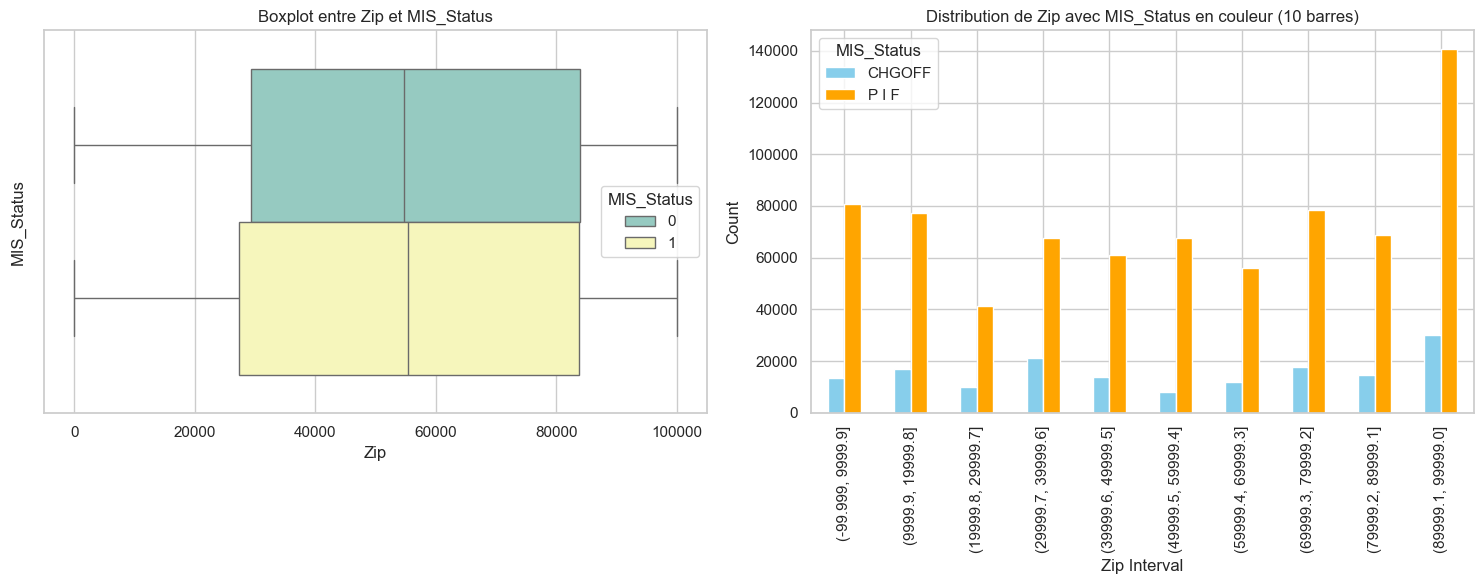

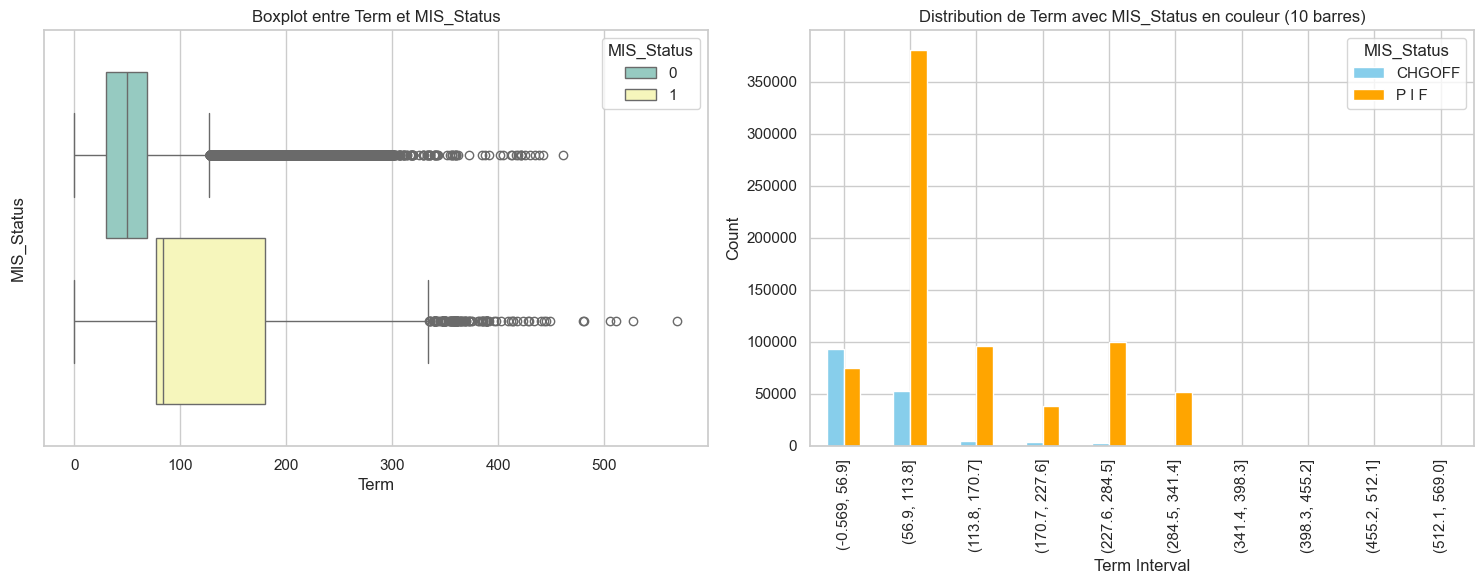

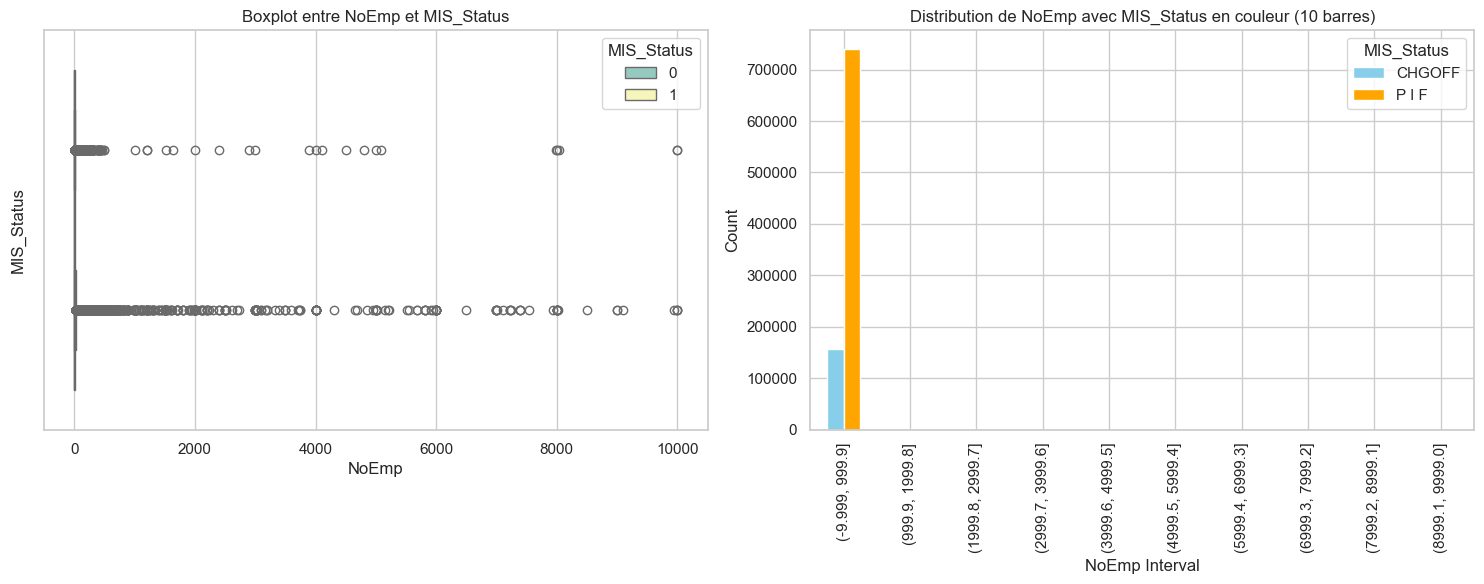

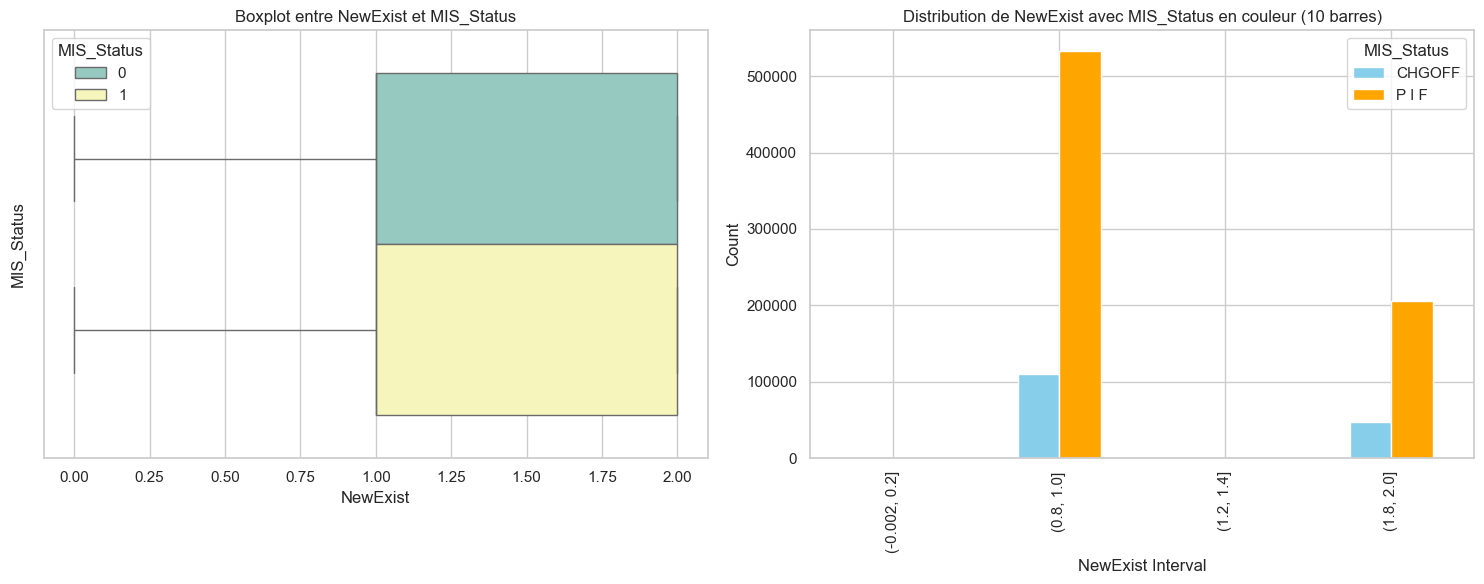

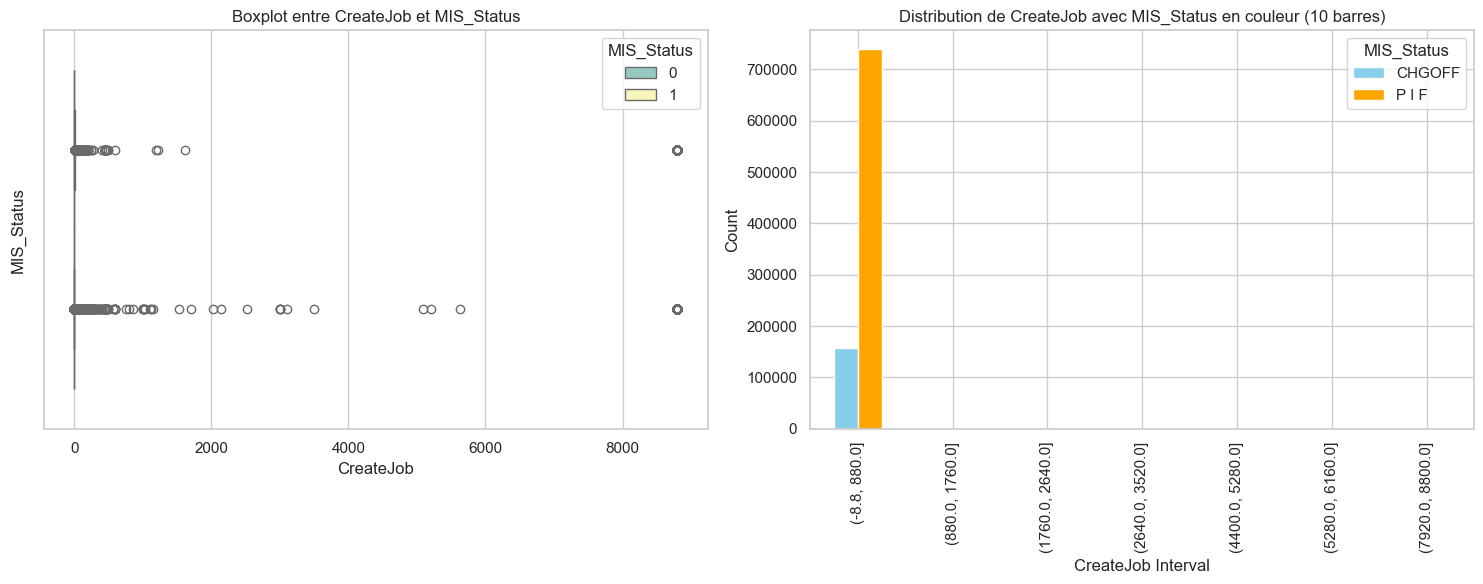

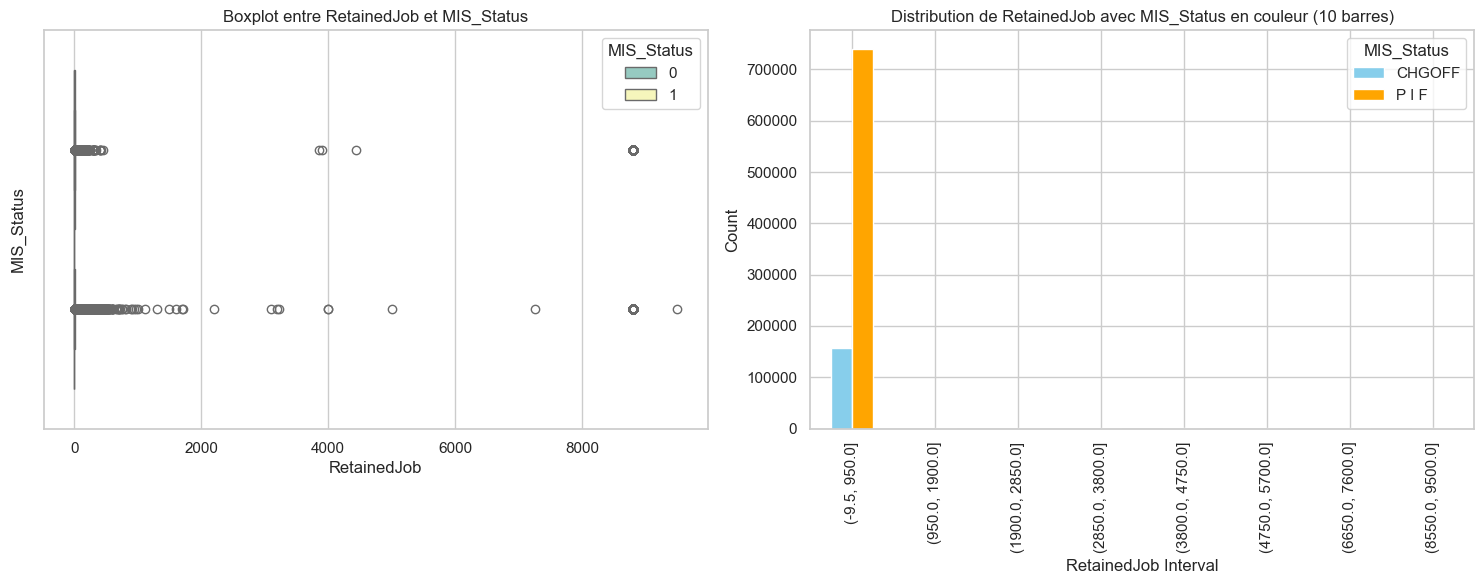

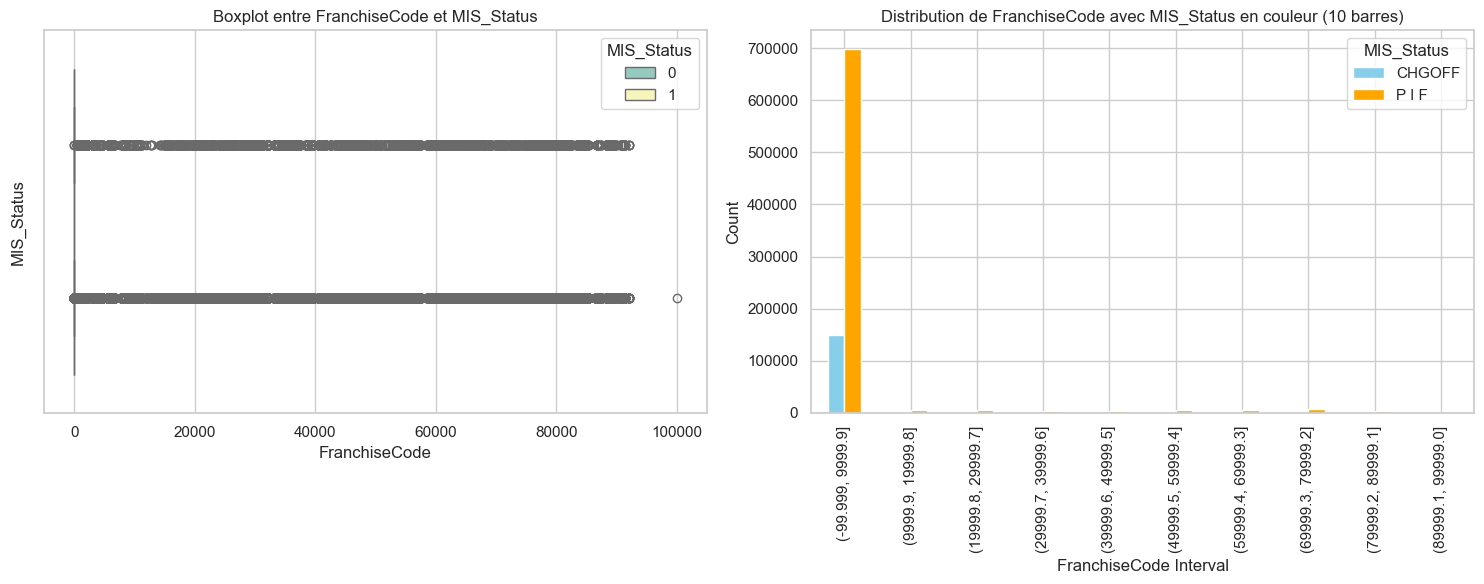

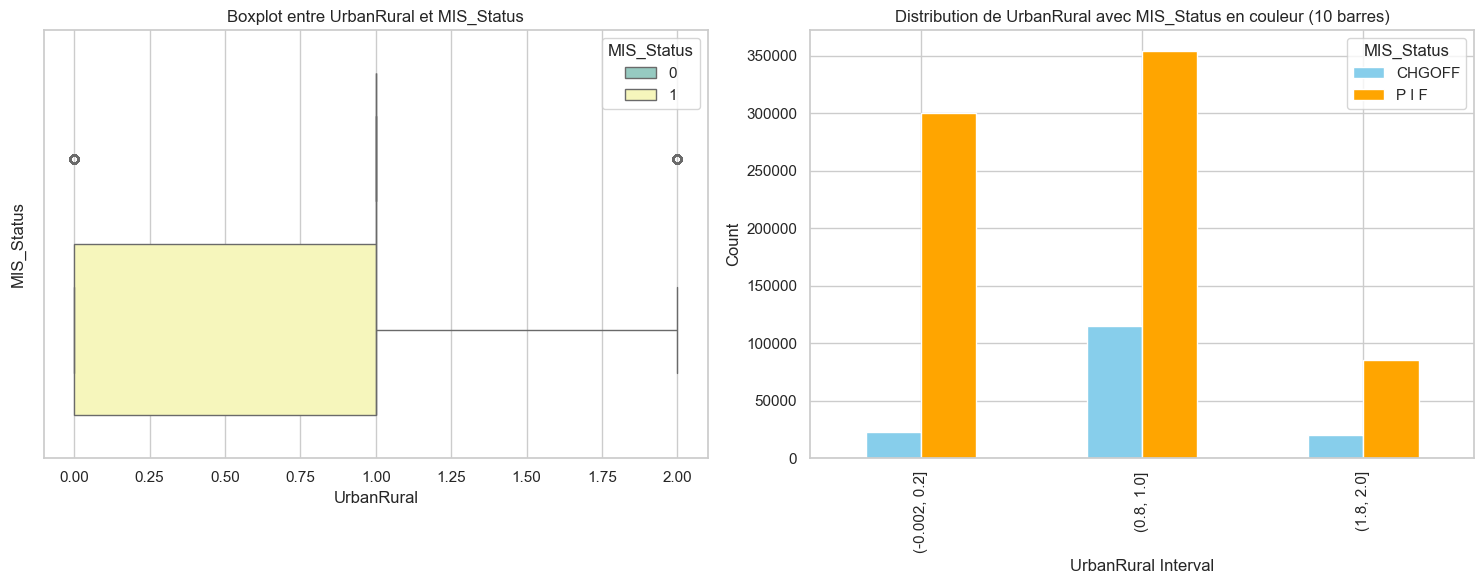

In [11]:
colonnes_to_graphe = ['Zip', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural']

plot_term_analysis(df, 'Zip')
plot_term_analysis(df, 'Term')
plot_term_analysis(df, 'NoEmp')
plot_term_analysis(df, 'NewExist')
plot_term_analysis(df, 'CreateJob')
plot_term_analysis(df, 'RetainedJob')
plot_term_analysis(df, 'FranchiseCode')
plot_term_analysis(df, 'UrbanRural')

/var/folders/2d/rl2wdlyn7t93k68_f2b6tmzw0000gn/T/ipykernel_9162/3973723996.py:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                 Zip           Term          NoEmp       NewExist  \
count  899164.000000  899164.000000  899164.000000  899028.000000   
mean    53804.391241     110.773078      11.411353       1.280404   
std     31184.159152      78.857305      74.108196       0.451750   
min         0.000000       0.000000       0.000000       0.000000   
25%     27587.000000      60.000000       2.000000       1.000000   
50%     55410.000000      84.000000       4.000000       1.000000   
75%     83704.000000     120.000000      10.000000       2.000000   
max     99999.000000     569.000000    9999.000000       2.000000   

           CreateJob    RetainedJob  FranchiseCode     UrbanRural  
count  899164.000000  899164.000000  899164.000000  899164.000000  
mean        8.430376      10.797257    2753.725933       0.757748  
std       236.688165     237.120600   12758.019136       0.646436  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000   

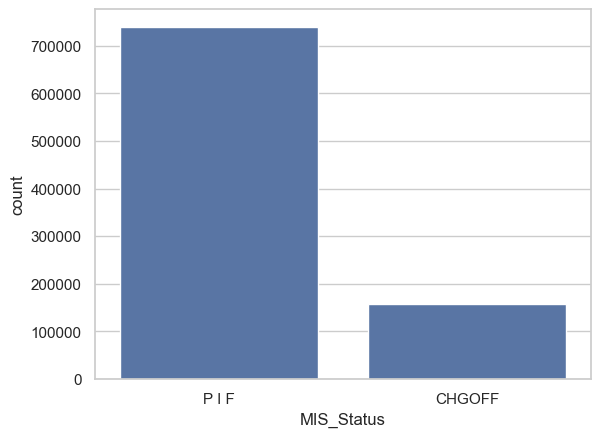

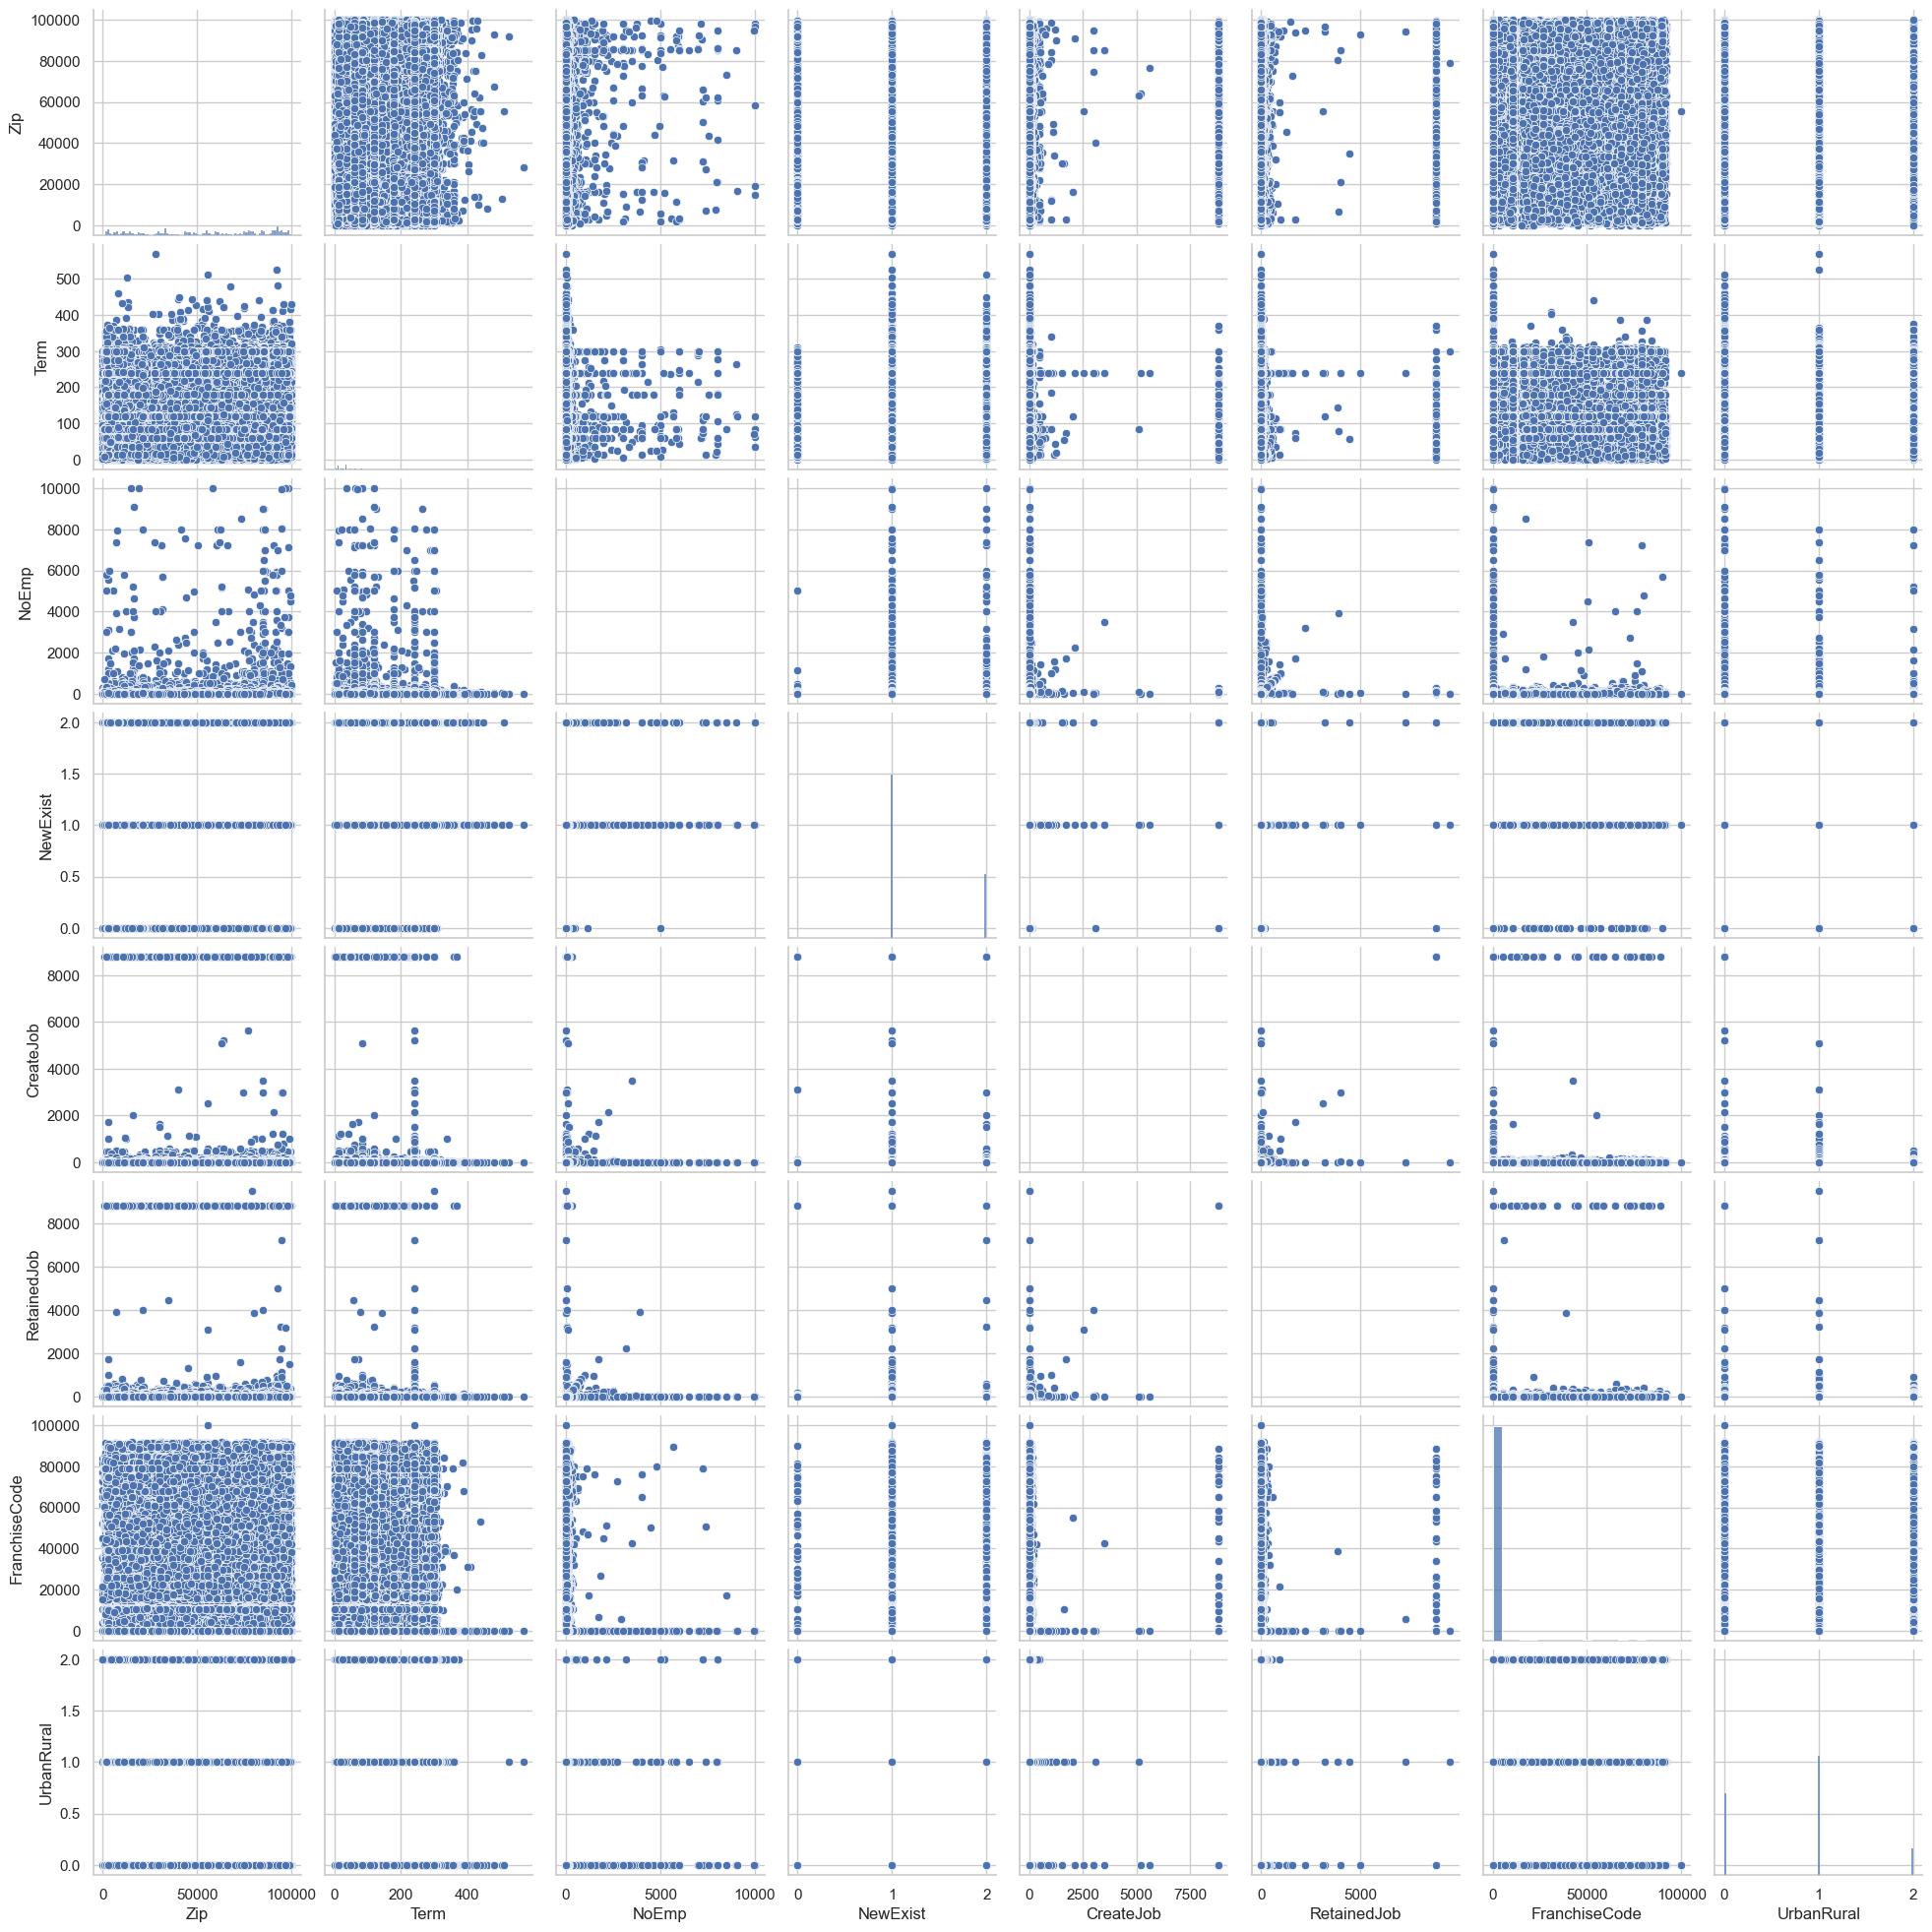

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
file_path = 'datasets/SBAnationalOnlyGoodFeatures.csv'
df = pd.read_csv(file_path)

# Statistiques descriptives
print(df[features_numeriques.columns].describe())

# Distribution de la variable cible
sns.countplot(x='MIS_Status', data=df)
plt.show()

# Relations entre les variables
sns.pairplot(df[features_numeriques.columns])
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Gestion des valeurs manquantes
df = df.dropna()


colonnes_categorielles = ['Name', 'City', 'State', 'Bank', 'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'RevLineCr', 'LowDoc']
features_categorielles = df[colonnes_categorielles]
colonnes_numeriques = ['Zip', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'MIS_Status', 'GrAppv']
features_numeriques = df[colonnes_numeriques]

# # Encodage one-hot pour les variables catégorielles
# encoder = OneHotEncoder(drop='first')
# features_cat_encoded = pd.DataFrame(encoder.fit_transform(features_categorielles), columns=encoder.get_feature_names_out(features_categorielles.columns))

# Concaténation des features encodées avec les features numériques
X = pd.concat([features_categorielles, features_numeriques], axis=1)

# Encodage de la variable cible
y = df['MIS_Status'].map({'P I F': 1, 'CHGOFF': 0})

# Division en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
